<a href="https://colab.research.google.com/github/Sakshi-Prajapati/ML_LABS/blob/main/ML_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

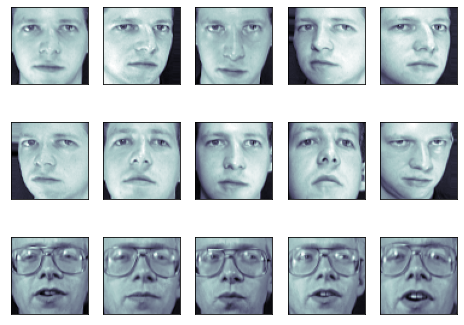

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target)
y_test

array([28,  0,  8, 18, 24, 15, 10,  8,  1, 15, 37, 34,  9, 36, 19,  9, 13,
       32, 26, 23, 29, 24, 18, 16,  8, 16,  9, 22, 32,  1, 39, 17, 13, 14,
       39,  4,  6, 22, 32,  6, 39, 26,  9, 13, 28,  0, 39, 30,  7, 17, 30,
       35,  1, 27,  1, 28, 25, 20, 27, 25, 36,  2, 33, 31, 14, 28,  0, 31,
        6,  9, 24, 31, 36, 27, 24,  9,  7, 16, 15,  6, 13,  5, 24, 15, 34,
        3,  3, 22, 32, 35, 38, 20, 30, 28, 12, 32, 26,  8, 13, 26])

Decomposistion Step


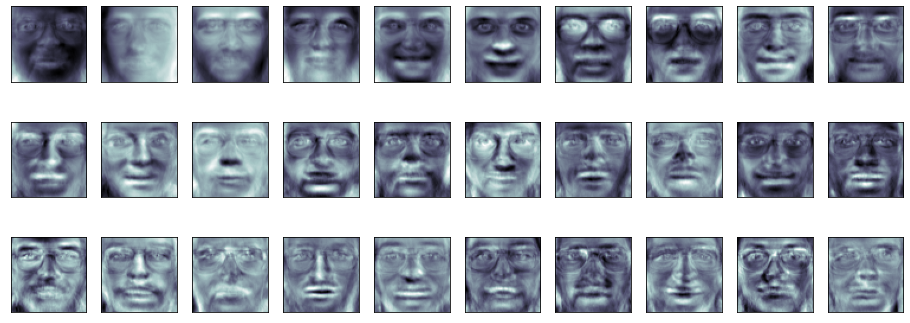

In [19]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=130, whiten=True)
pca.fit(X_train)
# plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)
fig = plt.figure(figsize=(16,6))
for i in range(30):
  ax = fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [20]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(300, 130) (100, 130)


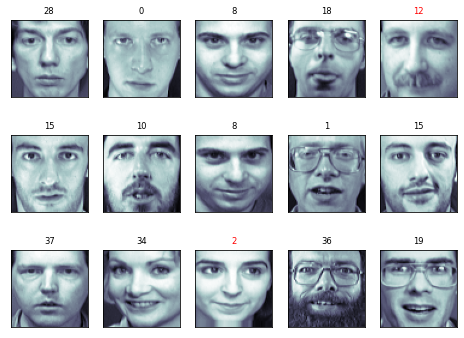

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import numpy as np

gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

# clf = svm.SVC(C=5, gamma=0.001)
# clf.fit(X_train_pca, y_train)

fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape ),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color= color)

In [22]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.75      0.86         4
           2       0.20      1.00      0.33         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.25      0.40         4
           7       0.29      1.00      0.44         2
           8       1.00      1.00      1.00         4
           9       1.00      0.17      0.29         6
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          12       0.33      1.00      0.50         1
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       0.75      1.00      0.86         3
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian without PCA


In [23]:
nbf = GaussianNB()
nbf.fit(X_train, y_train)
y_pred = nbf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.25      1.00      0.40         1
           2       1.00      0.33      0.50         3
           3       1.00      0.25      0.40         8
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      0.75      0.86         4
          17       1.00      1.00      1.00         2
          18       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree without PCA

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)
y_pred = dtf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         5
           3       0.50      0.20      0.29         5
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       0.25      0.33      0.29         3
           7       0.50      1.00      0.67         1
           8       0.25      0.50      0.33         2
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.60      0.50      0.55         6
          14       0.50      0.50      0.50         2
          15       0.25      1.00      0.40         1
          16       0.67      0.67      0.67         3
          17       0.50      1.00      0.67         1
          18       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PipeLining

1) using Gaussian NB

In [25]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca',decomposition.PCA(n_components=130, whiten=True)),('gnb',GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         3
           2       1.00      0.25      0.40         4
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       1.00      0.29      0.44         7
           8       1.00      1.00      1.00         4
           9       0.17      1.00      0.29         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         2
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      0.75      0.86         4
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Decision TRee


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.50      0.50         4
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.25      0.33      0.29         3
           9       0.17      1.00      0.29         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.20      1.00      0.33         1
          14       1.00      0.67      0.80         3
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Using SVC


In [27]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         2
          18       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Exercises

Ex1 done *above*

EX2

In [28]:
from sklearn import decomposition
from sklearn import datasets
data1 = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)

pca = decomposition.PCA(n_components=4, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
# another part is below
# Ex3
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_pred,y_test))

(112, 4) (38, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.85      0.88        13
           2       0.88      0.93      0.90        15

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



In [29]:
from sklearn.naive_bayes import GaussianNB
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('nb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.85      0.88        13
           2       0.88      0.93      0.90        15

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [31]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.52      0.69        23
           2       0.31      1.00      0.48         5

    accuracy                           0.71        38
   macro avg       0.77      0.84      0.72        38
weighted avg       0.91      0.71      0.74        38

